In [1]:
import pandas as pd

df = pd.read_csv('ETH-EUR_11_11_2017-07_12_2022.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
1,2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2,2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
3,2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
4,2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...,...
1848,2022-12-03,1228.524658,1233.634277,1178.109009,1179.914917,1179.914917,5383260945
1849,2022-12-04,1179.805054,1216.072144,1179.513306,1214.238892,1214.238892,4907319346
1850,2022-12-05,1213.994385,1235.194458,1194.303833,1200.085205,1200.085205,5830823675
1851,2022-12-06,1200.254272,1215.105103,1191.981812,1214.847778,1214.847778,4861872460


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2017-11-11,269.811371
1,2017-11-12,264.072021
2,2017-11-13,271.556213
3,2017-11-14,286.394958
4,2017-11-15,282.937531
...,...,...
1848,2022-12-03,1179.914917
1849,2022-12-04,1214.238892
1850,2022-12-05,1200.085205
1851,2022-12-06,1214.847778


In [3]:
df['Date']

0       2017-11-11
1       2017-11-12
2       2017-11-13
3       2017-11-14
4       2017-11-15
           ...    
1848    2022-12-03
1849    2022-12-04
1850    2022-12-05
1851    2022-12-06
1852    2022-12-07
Name: Date, Length: 1853, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2017-11-11,269.811371
1,2017-11-12,264.072021
2,2017-11-13,271.556213
3,2017-11-14,286.394958
4,2017-11-15,282.937531
...,...,...
1848,2022-12-03,1179.914917
1849,2022-12-04,1214.238892
1850,2022-12-05,1200.085205
1851,2022-12-06,1214.847778


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\User\AppData\Local\Temp\ipykernel_21944\1038773143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2017-11-11
1      2017-11-12
2      2017-11-13
3      2017-11-14
4      2017-11-15
          ...    
1848   2022-12-03
1849   2022-12-04
1850   2022-12-05
1851   2022-12-06
1852   2022-12-07
Name: Date, Length: 1853, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2017-11-11,269.811371
2017-11-12,264.072021
2017-11-13,271.556213
2017-11-14,286.394958
2017-11-15,282.937531
...,...
2022-12-03,1179.914917
2022-12-04,1214.238892
2022-12-05,1200.085205


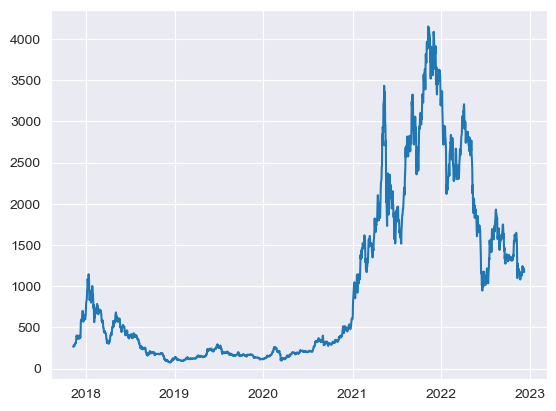

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,1417.461426,1417.719116,1348.891357,1354.783813
1,2021-03-26,1417.719116,1348.891357,1354.783813,1443.793823
2,2021-03-27,1348.891357,1354.783813,1443.793823,1455.369385
3,2021-03-28,1354.783813,1443.793823,1455.369385,1435.042847
4,2021-03-29,1443.793823,1455.369385,1435.042847,1546.231812
...,...,...,...,...,...
359,2022-03-19,2515.069336,2536.099365,2661.806641,2662.632813
360,2022-03-20,2536.099365,2661.806641,2662.632813,2590.363037
361,2022-03-21,2661.806641,2662.632813,2590.363037,2630.493408
362,2022-03-22,2662.632813,2590.363037,2630.493408,2695.607178


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((364,), (364, 3, 1), (364,))

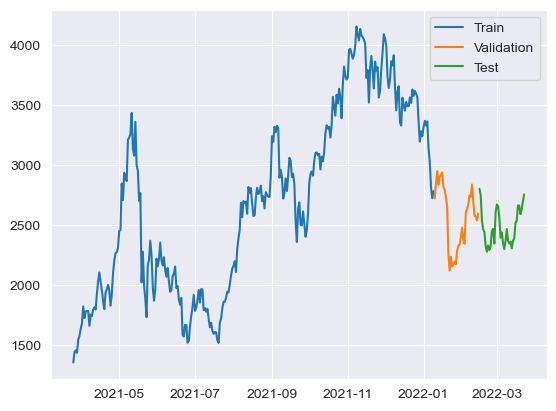

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.python.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              #optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 37ms/step - loss: 7882958.5000 - mean_absolute_error: 2701.4834 - val_loss: 6610794.0000 - val_mean_absolute_error: 2558.4541
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 7878388.5000 - mean_absolute_error: 2700.6316 - val_loss: 6606446.0000 - val_mean_absolute_error: 2557.6045
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 7873350.5000 - mean_absolute_error: 2699.6948 - val_loss: 6601042.0000 - val_mean_absolute_error: 2556.5479
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 7867166.0000 - mean_absolute_error: 2698.5515 - val_loss: 6594490.0000 - val_mean_absolute_error: 2555.2661
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 7859864.0000 - mean_absolute_error: 2697.1970 - val_loss: 6586966.0000 - val_mean_absolute_error: 2553.7935
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 7851397.5000 - mean_a

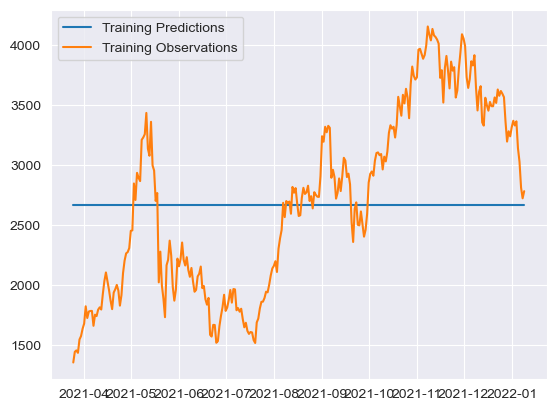

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

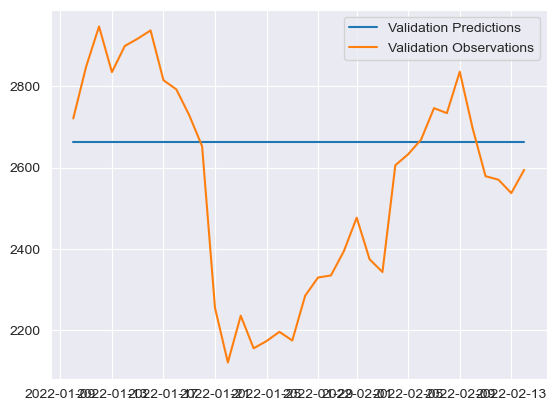

In [15]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])